In [165]:
import pandas as pd
import numpy as np

In [166]:
#Importing the Dataset
data=pd.read_csv('all_data_info.csv')

##### Observing Styles

In [167]:
data['style'].value_counts()

Impressionism               10644
Realism                     10525
Romanticism                  9285
Expressionism                7013
Post-Impressionism           5784
                            ...  
Spectralism                     5
Kinetic Art                     3
Ilkhanid                        2
Environmental (Land) Art        1
Renaissance                     1
Name: style, Length: 136, dtype: int64

In [164]:
#Combining the specific styles into it's parent style

#Northern Renaissance, Mannerism, Early Renaissance, and High Renaissance belongs to Renaissance 
data['style'].mask(data['style'] == 'Northern Renaissance', 'Renaissance', inplace=True)
data['style'].mask(data['style'] == 'Mannerism (Late Renaissance)', 'Renaissance', inplace=True)
data['style'].mask(data['style'] == 'Early Renaissance', 'Renaissance', inplace=True)
data['style'].mask(data['style'] == 'High Renaissance', 'Renaissance', inplace=True)

#Combined Synthetic and Analytical Cubism into Cubism
data['style'].mask(data['style'] == 'Synthetic Cubism', 'Cubism', inplace=True)
data['style'].mask(data['style'] == 'Analytical Cubism', 'Cubism', inplace=True)

#Combined Abstract Expressionism into Abstart Art
data['style'].mask(data['style'] == 'Abstract Expressionism', 'Abstract Art', inplace=True)

#Combined Rococo into Baroque
data['style'].mask(data['style'] == 'Rococo', 'Baroque', inplace=True)

#Combined Post-Impressionism into Impressionism
data['style'].mask(data['style'] == 'Post-Impressionism', 'Impressionism', inplace=True)



In [141]:
n_styles=[]
for i in data['style'].value_counts():
    if i>1000:
        n_styles.append(i)

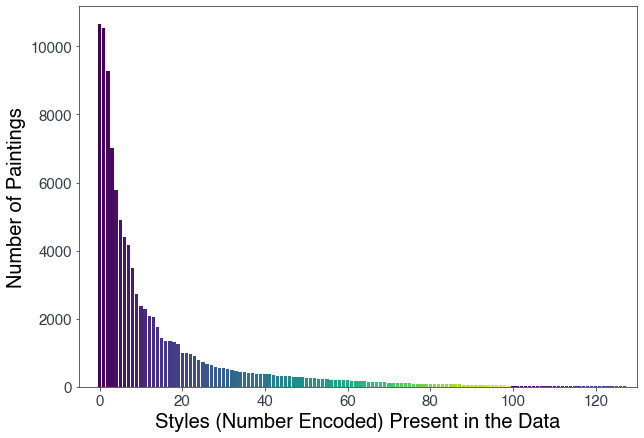

In [201]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from matplotlib import cm
# get the colormap and extract 5 colours
viridis = cm.get_cmap('viridis', 100)


plt.figure(figsize=(10,7))
plt.bar(range(len(data['style'].value_counts().index)),data['style'].value_counts(),
        color=viridis.colors)
plt.ylabel("Number of Paintings", size=20)
#plt.yscale('log')
plt.xlabel("Styles (Number Encoded) Present in the Data", size=20)
plt.xlim(-5,130)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)



plt.savefig('hist.png', dpi=300)
plt.show()


In [179]:
#Shows how skewed the styles are
import plotly.express as px
import pandas as pd
#plt.figure(figsize=(50,50))
df = pd.DataFrame(dict(
    r=data['style'].value_counts().values,
    theta=list(data['style'].value_counts().index)))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.show()

In [129]:
#Observing the styles that have more than 2000 paintings 
sum(data['style'].value_counts()>2000)

13

In [101]:
for s, i in zip( data['style'].value_counts().index, data['style'].value_counts()):
    if i>2000:
        print(s, end=' ')
        print(i)

Impressionism 16428
Realism 10525
Romanticism 9285
Baroque 7133
Expressionism 7013
Renaissance 6387
Art Nouveau (Modern) 4899
Surrealism 4167
Symbolism 3476
Abstract Art 3053
Naïve Art (Primitivism) 2295
Neoclassicism 2038
Cubism 2021


When learning more about these styles, we noticed that 10 of them are extremely promenent and they also show the evolution of art forms from the 1400s-2000s. Hence for this project, we looked at these 10 styles:
<br>
1) Impressionism
<br>
2) Realism
<br>
3) Romanticism
<br>
4) Baroque
<br>
5) Expressionism
<br>
6) Renaissance
<br>
7) Art Nouveau (Modern)
<br>
8) Surrealism 
<br>
9) Abstract Art
<br>
10) Cubism

In [102]:
#Storing the final styles in the list styles
styles=['Impressionism','Realism','Romanticism','Baroque',
         'Expressionism','Renaissance','Art Nouveau (Modern)', 
          'Surrealism','Abstract Art','Cubism']

In [103]:
styles_data=data[data['style'].isin(styles)]

In [104]:
styles_data.shape

(70911, 12)

The Styles Dataset consists of 70911 paintings

##### Observing Artists

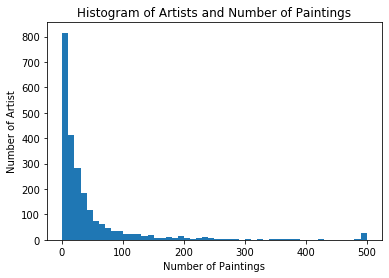

In [105]:
import matplotlib.pyplot as plt
plt.hist(data['artist'].value_counts(), bins=50)
plt.title("Histogram of Artists and Number of Paintings")
plt.ylabel("Number of Artist")
plt.xlabel("Number of Paintings")
plt.show()

In [106]:
#Shows how skewed the artist are
import plotly.express as px
import pandas as pd
plt.figure(figsize=(50,50))
df = pd.DataFrame(dict(
    r=data['artist'].value_counts().values,
    theta=list(data['artist'].value_counts().index)))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.show()

<Figure size 3600x3600 with 0 Axes>

In [107]:
data['artist'].value_counts()

Pierre-Auguste Renoir                     500
Zdislav Beksinski                         500
Giovanni Battista Piranesi                500
Camille Pissarro                          500
Ilya Repin                                500
                                         ... 
Consciousness                               1
happiness can not see". Royal chambers      1
∞ / détail 4914800                          1
Confession                                  1
Roman Opalka                                1
Name: artist, Length: 2319, dtype: int64

In [108]:
#The number of artists with 500 paintings
sum(data['artist'].value_counts()==500)

16

It can be seen that similar to the styles, there is a number of artists with very few paintings. We noticed that the highest number of paintings that an artist has is 500 and there are 16 artists with this amount of paintings.

In [109]:
#Identifying which artists have 500 paintings.
artists=[]
for s, i in zip( data['artist'].value_counts().index, data['artist'].value_counts()):
    if i==500:
        print(s)
        artists.append(s)

Pierre-Auguste Renoir
Zdislav Beksinski
Giovanni Battista Piranesi
Camille Pissarro
Ilya Repin
Rembrandt
Gustave Dore
Ivan Aivazovsky
Albrecht Durer
Paul Cezanne
Pablo Picasso
Vincent van Gogh
Marc Chagall
Ivan Shishkin
Martiros Saryan
John Singer Sargent


In order to bring integrity into our project, we researched about each artist and wanted to ensure that the artists we finalise for the classification also strongly represent the 10 styles mentioned above. Hence, we ha

In [110]:
#This is a dictionary which contains artist as key and the styles they paint as values
a_s_dict={}
for a in artists:
    #subsetting data based on the artist
    ad=data[data['artist']==a]
    a_s_dict[a]=ad['style'].unique()

In [111]:
for k,v in a_s_dict.items():
    print(k,v)

Pierre-Auguste Renoir ['Impressionism' 'Orientalism' 'Realism']
Zdislav Beksinski ['Surrealism']
Giovanni Battista Piranesi ['Neoclassicism']
Camille Pissarro ['Impressionism' 'Realism' 'Pointillism']
Ilya Repin ['Realism' 'Impressionism' nan]
Rembrandt ['Baroque' nan]
Gustave Dore ['Romanticism']
Ivan Aivazovsky ['Romanticism']
Albrecht Durer ['Renaissance' nan]
Paul Cezanne ['Impressionism' 'Romanticism' 'Cubism']
Pablo Picasso ['Impressionism' 'Symbolism' 'Expressionism' 'Realism'
 'Art Nouveau (Modern)' 'Neoclassicism' 'Cubism' 'Naïve Art (Primitivism)'
 'Surrealism' 'Pointillism']
Vincent van Gogh ['Impressionism' 'Realism' 'Cloisonnism' 'Japonism']
Marc Chagall ['Naïve Art (Primitivism)' 'Surrealism' 'Cubism' 'Expressionism' nan]
Ivan Shishkin ['Realism']
Martiros Saryan ['Realism' 'Expressionism' 'Symbolism' 'Socialist Realism' 'Fauvism'
 'Impressionism' 'Naïve Art (Primitivism)' 'Art Nouveau (Modern)' nan]
John Singer Sargent ['Realism' 'Neoclassicism' 'Impressionism']


We noticed that Giovanni Battista Piranesi, John Singer Sargent, Ilya Repin strongly represent NeoClassicism and hence we decided to not include them in the study further. Upon removing them from the total artists, we get a total of 12 well-known artists, mentioned below

1) Ivan Aivazovsky
<br>
2) Marc Chagall
<br>
3) Camille Pissarro
<br>
4) Albrecht Durer
<br>
5) Vincent Van Gogh
<br>
6) Paul Cezanne
<br>
7) Martiros Saryan
<br>
8) Ivan Shishkin
<br>
9) Gustave Dore
<br>
10) Pierre-Auguste Renoir
<br>
11) Rembrandt
<br>
12) Pablo Picasso


In [112]:
artists=['Ivan Aivazovsky','Marc Chagall','Camille Pissarro',
         'Albrecht Durer','Vincent van Gogh','Paul Cezanne',
         'Martiros Saryan','Ivan Shishkin','Gustave Dore',
         'Pierre-Auguste Renoir','Rembrandt','Pablo Picasso']

In [113]:
#Final Artist Dataset
artist_data=data[data['artist'].isin(artists)]

In [114]:
artist_data.shape

(6000, 12)

The Artist Dataset consists of 6000 paintings.

In [120]:
styles_data[styles_data['style']=='Expressionism']

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
90,August Macke,c.1910,genre painting,3846,5592,11625509,wikiart,Expressionism,Sailing boat on the Tegernsee,train_and_test,True,31234.jpg
120,Ernst Ludwig Kirchner,1910,poster,3666,5376,8865341,wikiart,Expressionism,KG Brücke,train_and_test,True,65341.jpg
146,Ernst Ludwig Kirchner,1913,landscape,4908,3684,10682834,wikiart,Expressionism,Red Tree on the Beach,train_and_test,True,51728.jpg
165,Ernst Ludwig Kirchner,1919,animal painting,4464,3918,9862522,wikiart,Expressionism,Cows at Sunset,train_and_test,True,82971.jpg
168,Ernst Ludwig Kirchner,c.1916,genre painting,3348,5214,8872339,wikiart,Expressionism,In the Greenhouse,train_and_test,True,96372.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
103204,Paritosh Sen,1995,genre painting,388,388,163806,wikiart,Expressionism,Untitled,train_and_test,True,100684.jpg
103205,Serge Sudeikin,1946,self-portrait,386,390,43069,wikiart,Expressionism,Self-portrait,train_and_test,True,69237.jpg
103220,Louisa Matthiasdottir,1991,cityscape,460,327,39802,wikiart,Expressionism,Icelandic Village,train_and_test,True,92911.jpg
103221,Thalia Flora-Karavia,1942,portrait,338,445,19462,wikiart,Expressionism,Portrait of Yannis Tsarouchis,train_and_test,True,66007.jpg
